<a href="https://colab.research.google.com/github/zcakg86/house-sales-king-county/blob/main/house_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load packages

In [ ]:
import pandas as pd
import os
from google.colab import drive

# use seaborn for eda
import seaborn as sns
# use plotly for app
import plotly.express as px
# geospatial
import geopandas
!pip install pysal
import pysal
#drive.mount('/content/drive/')

os.chdir('/content/drive/MyDrive/data/')

## Load Data#

<Axes: >

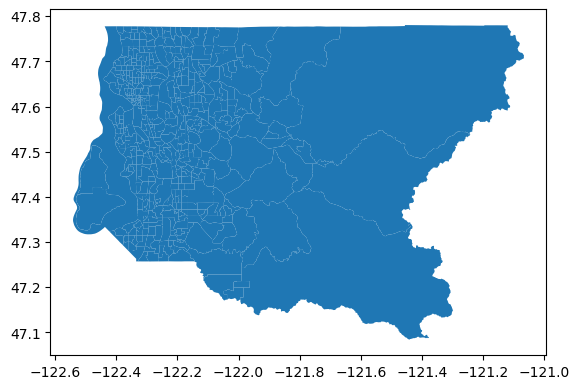

In [ ]:
# load census tracts
census_tracts_king_co = geopandas.read_file('2020_Census_Tracts_for_King_County___tracts20_area.geojson')
census_tracts_king_co.plot()

In [ ]:
# read csv
sales = pd.read_csv('kingco_sales.csv')
sales

,Unnamed: 0,sale_id,pinx,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
0,1,1999..144,..2734100475,1999-01-05,150000,1.0,,demo,1999,47.544359,...,0,0,0,0,0,0,0,0,0,E
1,2,1999..258,..1535200725,1999-01-05,235000,1.0,,demo,1999,47.421247,...,0,0,2,0,0,0,0,0,0,H
2,3,1999..331,..6028000255,1999-01-04,293000,1.0,,demo,1999,47.572103,...,0,0,0,0,0,0,0,0,0,R
3,4,1999..609,..1238501101,1999-01-11,178506,1.0,,demo,1999,47.685567,...,0,0,0,0,0,0,0,0,0,Q
4,5,1999..775,..1939800005,1999-01-07,270000,1.0,,demo,1999,47.764482,...,0,0,0,0,0,0,0,0,0,Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575314,575315,2023..26181,..9412700500,2023-12-20,595000,4.0,,reno - before,2023,47.393370,...,0,0,0,0,0,0,0,0,0,K
575315,575316,2023..26200,..7628700230,2023-12-13,875000,4.0,,reno - before,2023,47.571076,...,0,2,2,0,0,0,0,0,0,F
575316,575317,2023..26205,..9471200030,2023-12-14,2025000,2.0,,reno - before,2023,47.670817,...,0,0,2,0,0,0,0,0,0,C
575317,575318,2023..26232,..0425500130,2023-12-14,825000,4.0,,reno - before,2023,47.500221,...,0,0,0,0,0,0,0,0,0,K


### Check data

In [ ]:
display(sales.dtypes)

Unnamed: 0                   int64
sale_id                     object
pinx                        object
sale_date           datetime64[ns]
sale_price                   int64
sale_nbr                   float64
sale_warning                object
join_status                 object
join_year                    int64
latitude                   float64
longitude                  float64
area                         int64
city                        object
zoning                      object
subdivision                 object
present_use                  int64
land_val                     int64
imp_val                      int64
year_built                   int64
year_reno                    int64
sqft_lot                     int64
sqft                         int64
sqft_1                       int64
sqft_fbsmt                   int64
grade                        int64
fbsmt_grade                  int64
condition                    int64
stories                    float64
beds                

### Encode Dates

In [ ]:
sales["sale_date"] = pd.to_datetime(sales["sale_date"], format='%Y-%m-%d')
sales["sale_year"] = sales["sale_date"].dt.year
sales["sale_month"] = sales["sale_date"].dt.month
sales["sale_year_month"] = sales["sale_date"].dt.to_period("M")
sales["year_month"] = sales["sale_year_month"].astype(str)

#sales_2023 = sales.loc[
#    (sales["sale_date"] >= '2023-01-01') & (sales["sale_date"] < '2024-01-01')]

### Monthly Aggregation

In [ ]:

monthly_counts = sales.groupby("year_month")\
        .agg({'sale_id':'size', 'sale_price':'mean', 'sqft':'mean'})\
        .rename(columns={'sale_id':'count','sale_price':'mean_price','sqft':'mean_sqft'})\
        .reset_index()

#sales.groupby("sale_year_month")[mean_cols].mean()
display(monthly_counts)

,year_month,count,mean_price,mean_sqft
0,1999-01,1387,2.743247e+05,2117.347513
1,1999-02,1576,2.676150e+05,2072.910533
2,1999-03,2186,2.711619e+05,2082.332113
3,1999-04,2166,2.855885e+05,2074.984765
4,1999-05,2213,2.786742e+05,2046.547673
...,...,...,...,...
295,2023-08,1564,1.165598e+06,2133.320332
296,2023-09,1325,1.109072e+06,2063.181132
297,2023-10,1321,1.100747e+06,2033.016654
298,2023-11,1078,1.155428e+06,2086.479592


In [ ]:
fig1 = px.scatter(monthly_counts, x="year_month", y="mean_price")
fig1.show()

In [ ]:
fig2 = px.scatter(monthly_counts, x="year_month", y="mean_sqft")
fig2.show()

In [ ]:
fig1 = px.scatter_geo(sales.loc[sales["sale_year"]==2023], lat="latitude", lon="longitude", color = "submarket", fitbounds = "locations")
fig1.show()

### Create GeoDataSeries with sales data

In [ ]:
sales_points = geopandas.GeoDataFrame(sales, geometry=geopandas.points_from_xy(sales.longitude, sales.latitude), crs="EPSG:4326")

In [ ]:
sales_points.head()

,Unnamed: 0,sale_id,pinx,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,...,view_lakesamm,view_otherwater,view_other,submarket,sale_date2,sale_year,sale_month,sale_year_month,year_month,geometry
0,1,1999..144,..2734100475,1999-01-05,150000,1.0,,demo,1999,47.544359,...,0,0,0,E,1999-01-05,1999,1,1999-01,1999-01,POINT (-122.32079 47.54436)
1,2,1999..258,..1535200725,1999-01-05,235000,1.0,,demo,1999,47.421247,...,0,0,0,H,1999-01-05,1999,1,1999-01,1999-01,POINT (-122.43814 47.42125)
2,3,1999..331,..6028000255,1999-01-04,293000,1.0,,demo,1999,47.572103,...,0,0,0,R,1999-01-04,1999,1,1999-01,1999-01,POINT (-122.12226 47.57210)
3,4,1999..609,..1238501101,1999-01-11,178506,1.0,,demo,1999,47.685567,...,0,0,0,Q,1999-01-11,1999,1,1999-01,1999-01,POINT (-122.18574 47.68557)
4,5,1999..775,..1939800005,1999-01-07,270000,1.0,,demo,1999,47.764482,...,0,0,0,Q,1999-01-07,1999,1,1999-01,1999-01,POINT (-122.20807 47.76448)


In [ ]:
census_tracts_king_co.head()

,OBJECTID,STATEFP20,COUNTYFP20,TRACTCE20,GEO_ID_TRT,NAME20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,Shape_Leng,TRACT_LBL2,Shape_Length,Shape_Area,geometry
0,1,53,033,000101,53033000101,1.01,Census Tract,G5020,S,414848,0,+47.7301150,-122.2930741,8662.100980,Tract 000101,8662.100980,4.465062e+06,"POLYGON ((-122.29654 47.73198, -122.29655 47.7..."
1,2,53,033,000102,53033000102,1.02,Census Tract,G5020,S,1495019,918878,+47.7247297,-122.2845705,22442.914577,Tract 000102,22442.914577,2.598103e+07,"POLYGON ((-122.29640 47.72651, -122.29638 47.7..."
2,3,53,033,000201,53033000201,2.01,Census Tract,G5020,S,1806749,0,+47.7263725,-122.3160435,18651.594451,Tract 000201,18651.594451,1.944625e+07,"POLYGON ((-122.32358 47.72130, -122.32359 47.7..."
3,4,53,033,000202,53033000202,2.02,Census Tract,G5020,S,1480085,0,+47.7269637,-122.3026174,17285.853332,Tract 000202,17285.853332,1.593036e+07,"POLYGON ((-122.31005 47.73392, -122.31003 47.7..."
4,5,53,033,000300,53033000300,3,Census Tract,G5020,S,1211013,0,+47.7305259,-122.3329277,17298.152149,Tract 000300,17298.152149,1.303428e+07,"POLYGON ((-122.34521 47.73413, -122.34521 47.7..."


### Add membership of Census Tract

In [ ]:
# assign method
#sales_points = sales_points.assign(**{TRACTCE20: sales_points.within(geometry) for TRACTCE20, geometry in census_tracts_king_co.items()})

# sjoin method
sales_points = geopandas.sjoin(sales_points, census_tracts_king_co[["TRACTCE20","geometry"]], how="left", op='within')

# need to check for multiple joins ^

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.



In [ ]:
# get colour
import matplotlib
def color_unique(df, column):
    # get unique values
    unique = df[column].unique()

    # generate a color palette with as many colors
    # as there are unique values
    palette = sns.color_palette(None, len(unique)).as_hex()
    unique_palette = dict(zip(unique, palette))
    # add to dataframe
    cmap = matplotlib.colors.ListedColormap([unique_palette[b] for b in unique])
    return(cmap)

cmap = color_unique(sales_points, column="TRACTCE20")
#cmap = matplotlib.colors.ListedColormap([color_discrete_map[b] for b in VMA_dff.VMA_CAT.unique()])

In [ ]:
cmap

In [ ]:
base = census_tracts_king_co.plot(color='white', edgecolor='black')

sales_points.head().plot(ax=base, marker='o', cmap = cmap, markersize=1)

NotImplementedError: Abstract class only